In [1]:
import numpy as np
import matplotlib.pyplot as plt
X=np.linspace(1e-3,2,int(1e3))


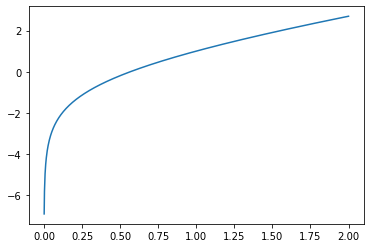

In [2]:
transc=lambda x: np.log(x)+x
transc_pr=lambda x: 1/x+1

plt.plot(X,transc(X))
plt.show()




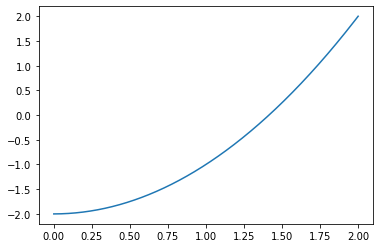

In [3]:
poly=lambda x: x**2-2
poly_pr=lambda x: 2*x
plt.plot(X,poly(X))
plt.show()

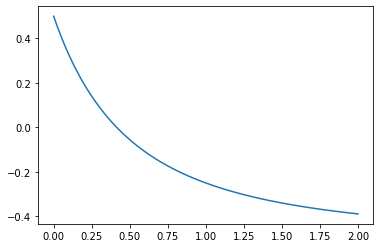

In [4]:
ex1=lambda x: 1/(x+1)**2-0.5
ex1_pr=lambda x: -2/(x+1)**3

plt.plot(X,ex1(X))
plt.show()


In [6]:
def bisection(f,a,b,N):    
    if (f(a)*f(b))>0:
        raise ValueError('Funkcja nie przyjmuje wartości o przeciwnych znakach na krańcach przedziału')        
    a_n = a
    b_n = b
    for n in range(1,N+1):
        m_n = (a_n + b_n)/2
        f_m_n = f(m_n)
        if f(a_n)*f_m_n < 0:
            a_n = a_n
            b_n = m_n
        elif f(b_n)*f_m_n < 0:
            a_n = m_n
            b_n = b_n
    return (a_n + b_n)/2



In [50]:
f=ex1

f=poly

f=transc

xgw1=bisection(f,1e-3,2,54)
res1=f(xgw1)
print("Przybliżenie rozwiązania %10.2e"%(xgw1))
print("Residuum %10.2e"%(res1))


Przybliżenie rozwiązania   5.67e-01
Residuum   2.22e-16


In [12]:
def secant(f,a,b,N):
    if (f(a)*f(b))>0:
        raise ValueError('Funkcja nie przyjmuje wartości o przeciwnych znakach na krańcach przedziału')    
    xn1=b
    xn2=a
    for n in range(1,N+1):
        if abs(f(xn1)-f(xn2))<10*np.spacing(1):
            raise ValueError('Residua za mało się różnią f(x_n-1)=%10.2e, f(x_n-1)=%10.2e, k=%10.0e'%(f(xn1),f(xn2),n))
        
        xn=xn1-f(xn1)*(xn1-xn2)/(f(xn1)-f(xn2))
        
        
        if np.abs(f(xn)) < 10*np.spacing(1):
            return(xn,n)
        xn2=xn1
        xn1=xn
    return (xn,n)

In [54]:

#f=ex1

#f=poly

#f=transc

xgw2,k=secant(f,1e-3,4,100)
res2=f(xgw2)
print("Przybliżenie rozwiązania %10.2e"%(xgw2))
print("Liczba iteracji "+str(k))
print("Residuum %10.2e"%(res2))


ValueError: Residua za mało się różnią f(x_n-1)= -5.00e-01, f(x_n-1)= -5.00e-01, k=     8e+00

In [20]:
def regulafalsi(f,a,b,N):    
    if (f(a)*f(b))>0:
        raise ValueError('Funkcja nie przyjmuje wartości o przeciwnych znakach na krańcach przedziału')    
    a_n = a
    b_n = b
    for n in range(1,N+1):
        c=(f(b_n)*a_n-f(a_n)*b_n)/(f(b_n)-f(a_n))
        f_c = f(c)
        if np.abs(f_c)< 10*np.spacing(1):
            return(c,n)      
        if f(a_n)*f_c < 0:
            a_n = a_n
            b_n = c
        elif f(b_n)*f_c < 0:
            a_n = c
            b_n = b_n
        if np.abs(b_n-a_n)< 10*np.spacing(1):
            return((a_n + b_n)/2,n)          
    return ((a_n + b_n)/2,n)

In [59]:
f=ex1

f=poly

f=transc
xgw3,k=regulafalsi(f,1e-3,2,200)
res3=f(xgw3)
print("Przybliżenie rozwiązania %10.2e"%(xgw3))
print("Liczba iteracji "+str(k))
print("Residuum %10.2e"%(res3))

Przybliżenie rozwiązania   5.67e-01
Liczba iteracji 134
Residuum   1.78e-15


In [25]:
def newton(f,fpr,x0,N):
    xn1=x0
    for n in range(1,N+1):
        if abs(fpr(xn1))<10*np.spacing(1):
            raise ValueError('Miejsce zerowe pochodnej xn-1=%10.2e, k=%10.0e'%(xn1,n))
        
        xn=xn1-f(xn1)/fpr(xn1)
        
        if np.abs(f(xn)) < 10*np.spacing(1):
            return(xn,n)
        xn1=xn
    return (xn,n)    


In [67]:
f=ex1

fpr=ex1_pr

f=poly
fpr=poly_pr

#f=transc
#fpr=transc_pr

xgw4,k=newton(f,fpr,1e-3,100)
res4=f(xgw3)
print("Przybliżenie rozwiązania %10.2e"%(xgw4))
print("Liczba iteracji "+str(k))
print("Residuum %10.2e"%(res4))


Przybliżenie rozwiązania   1.41e+00
Liczba iteracji 15
Residuum  -1.68e+00


In [29]:
from scipy.linalg import hessenberg
 
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")
      
    
# %% funkcje

def qr_no_shift(INP):
    A1=INP.copy()
    for k in range(1,1001):
        Q,R=np.linalg.qr(A1);
        A1=R@Q;
        if np.sum(np.abs(np.diag(A1,-1))) < np.spacing(1):
            return (A1,k)
    return (A1,k);

def qr_shift(INP):
    A1=INP.copy()
    for k in range(1,101):
        mu=A1[-1,-1];
        Q,R=np.linalg.qr(A1-mu*np.eye(A1.shape[0]));
        A1= R @ Q+mu*np.eye(A1.shape[0]);
        if np.abs(A1[-1,-2]) < np.spacing(1):
            if np.linalg.norm(A1-A1.T) < np.spacing(1):
                A1[-2,-1]=0;
            A1[-1,-2]=0;
            return (A1,k)
    return (A1,k)

In [30]:
    
# %%
# inicjalizacja macierzy diagonalenej z diagonalą 1,2,..,10
D = np.diag(np.linspace(1,9,9))
P = np.random.random(D.shape)

#macierz symetryczna
#Q,_ = np.linalg.qr(P)
#A = Q @ D @ Q.T
#A = 0.5*(A + A.T)

#niesymetryczna
A = P@D@np.linalg.inv(P)

#krok 1 hesjan
H = hessenberg(A)

# %% no shift
A_pom,totalit = qr_no_shift(H)

matprint(A_pom)
print('Całkowita liczba iteracji (QR bez przesunięć): '+str(totalit))

           9      2.72265       2.05651        2.9594      -3.3926      0.27516      8.44264      13.0485   -28.6269  
-1.99351e-16            8     -0.555027      -1.40537      2.43184      10.7704      2.79841    -0.552349   0.104418  
           0  7.98396e-18             7     -0.103201     0.885482     -1.43001    -0.956901   -0.0265385    1.88276  
           0            0  -4.54823e-20             6     0.830356      2.31995     0.130133     -1.33299   -1.26716  
           0            0             0  -2.43731e-23            5     -1.56958     -1.18502    0.0271426    3.46987  
           0            0             0             0  2.56562e-29            4     0.652627      1.12221   -2.77049  
           0            0             0             0            0  5.36297e-37            3     0.131408   0.756247  
           0            0             0             0            0            0  5.51539e-53            2  -0.233859  
           0            0             0         

In [31]:
# %% deflating
A_rob=H.copy()
m = H.shape[0]
totalit=0
for k in range(0,m-1):
    A_rob[0:m-k,0:m-k],it=qr_shift(A_rob[0:m-k,0:m-k])
    print(it)
    totalit+=it
    
matprint(A_rob)
print('Całkowita liczba iteracji (QR z przesunięciami i deflacją): '+str(totalit))

6
3
5
4
5
3
6
2
9  -2.72265   -17.019    1.36489      11.0296   3.12262   -8.05923    6.58138   -24.2038  
0         8  -4.67234   0.259547      6.07763   1.29829   -3.19911   0.785892    3.57457  
0         0         1  -0.354786  -0.00145337  -1.51633   -1.51374    1.66076   -5.75462  
0         0         0          7    -0.339385  -1.43294   -1.26535  -0.574323   0.239871  
0         0         0          0            2     1.944   0.945514   -0.96951    1.44965  
0         0         0          0            0         6  -0.214112  -0.210695  -0.858515  
0         0         0          0            0         0          5   0.305235   -2.46612  
0         0         0          0            0         0          0          3  -0.172118  
0         0         0          0            0         0          0          0          4  
Całkowita liczba iteracji (QR z przesunięciami i deflacją): 34
